In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_2015= pd.read_csv("/content/drive/My Drive/Edstats_csv/2015-building-energy-benchmarking.csv/2015-building-energy-benchmarking.csv")
df_2016= pd.read_csv("/content/drive/My Drive/Edstats_csv/2016-building-energy-benchmarking.csv/2016-building-energy-benchmarking.csv")

In [ ]:
df_2015.drop(['DataYear','PropertyName', 'TaxParcelIdentificationNumber', 
       'CouncilDistrictCode','DefaultData', 'Comment', 'ComplianceStatus','ListOfAllPropertyUseTypes','LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseType',
         'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA', 
       '2010 Census Tracts','Seattle Police Department Micro Community Policing Plan Areas',
       'City Council Districts','Neighborhood', 'YearsENERGYSTARCertified','SPD Beats', 'Zip Codes','Outlier'],axis=1,inplace=True)

df_2015.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,Location,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,NonResidential,Hotel,"{'latitude': '47.61219025', 'longitude': '-122...",1927,1,12.0,88434,0,88434,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64
1,2,NonResidential,Hotel,"{'latitude': '47.61310583', 'longitude': '-122...",1996,1,11.0,103566,15064,88502,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38
2,3,NonResidential,Hotel,"{'latitude': '47.61334897', 'longitude': '-122...",1969,1,41.0,961990,0,961990,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92
3,5,NonResidential,Hotel,"{'latitude': '47.61421585', 'longitude': '-122...",1926,1,10.0,61320,0,61320,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38
4,8,NonResidential,Hotel,"{'latitude': '47.6137544', 'longitude': '-122....",1980,1,18.0,119890,12460,107430,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02


In [ ]:
df_2016.drop(['DataYear','PropertyName', 'TaxParcelIdentificationNumber', 
       'CouncilDistrictCode','DefaultData','ListOfAllPropertyUseTypes','LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseType',
         'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','Comments'  
       ,'Neighborhood', 'YearsENERGYSTARCertified', 'ZipCode','Address','City','State','Outlier'],axis=1,inplace=True)

df_2016.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,47.61220,-122.33799,1927,1.0,12,88434,0,88434,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,Compliant,249.98,2.83
1,2,NonResidential,Hotel,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,Compliant,295.86,2.86
2,3,NonResidential,Hotel,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,Compliant,2089.28,2.19
3,5,NonResidential,Hotel,47.61412,-122.33664,1926,1.0,10,61320,0,61320,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,Compliant,286.43,4.67
4,8,NonResidential,Hotel,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,Compliant,505.01,2.88


In [ ]:
df_2015.set_index(['OSEBuildingID'],inplace=True)
df_2016.set_index(['OSEBuildingID'],inplace=True)

In [ ]:
df_2015.isnull().sum()

BuildingType                           0
PrimaryPropertyType                    0
Location                               0
YearBuilt                              0
NumberofBuildings                      0
NumberofFloors                         8
PropertyGFATotal                       0
PropertyGFAParking                     0
PropertyGFABuilding(s)                 0
ENERGYSTARScore                      780
SiteEUI(kBtu/sf)                      10
SiteEUIWN(kBtu/sf)                    10
SourceEUI(kBtu/sf)                    10
SourceEUIWN(kBtu/sf)                  10
SiteEnergyUse(kBtu)                   10
SiteEnergyUseWN(kBtu)                 10
SteamUse(kBtu)                        10
Electricity(kWh)                      10
Electricity(kBtu)                     10
NaturalGas(therms)                    10
NaturalGas(kBtu)                      10
OtherFuelUse(kBtu)                    10
GHGEmissions(MetricTonsCO2e)          10
GHGEmissionsIntensity(kgCO2e/ft2)     10
dtype: int64

In [ ]:
df_2016.isnull().sum()

BuildingType                0
PrimaryPropertyType         0
Latitude                    0
Longitude                   0
YearBuilt                   0
NumberofBuildings           8
NumberofFloors              0
PropertyGFATotal            0
PropertyGFAParking          0
PropertyGFABuilding(s)      0
ENERGYSTARScore           843
SiteEUI(kBtu/sf)            7
SiteEUIWN(kBtu/sf)          6
SourceEUI(kBtu/sf)          9
SourceEUIWN(kBtu/sf)        9
SiteEnergyUse(kBtu)         5
SiteEnergyUseWN(kBtu)       6
SteamUse(kBtu)              9
Electricity(kWh)            9
Electricity(kBtu)           9
NaturalGas(therms)          9
NaturalGas(kBtu)            9
ComplianceStatus            0
TotalGHGEmissions           9
GHGEmissionsIntensity       9
dtype: int64

In [ ]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3340 entries, 1 to 50059
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BuildingType                       3340 non-null   object 
 1   PrimaryPropertyType                3340 non-null   object 
 2   Location                           3340 non-null   object 
 3   YearBuilt                          3340 non-null   int64  
 4   NumberofBuildings                  3340 non-null   int64  
 5   NumberofFloors                     3332 non-null   float64
 6   PropertyGFATotal                   3340 non-null   int64  
 7   PropertyGFAParking                 3340 non-null   int64  
 8   PropertyGFABuilding(s)             3340 non-null   int64  
 9   ENERGYSTARScore                    2560 non-null   float64
 10  SiteEUI(kBtu/sf)                   3330 non-null   float64
 11  SiteEUIWN(kBtu/sf)                 3330 non-null   floa

In [ ]:
df_2015.dropna(inplace=True)
df_2016.dropna(inplace=True)

In [ ]:
print(df_2015.shape)
print(df_2016.shape)

(2557, 24)
(2532, 25)


In [ ]:
df_2016.rename(columns={"TotalGHGEmissions": "GHGEmissions(MetricTonsCO2e)", "GHGEmissionsIntensity": "GHGEmissionsIntensity(kgCO2e/ft2)"},inplace=True)

In [ ]:
df_2015.corr()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
YearBuilt,1.000000,-0.000889,0.135709,0.191093,0.251526,0.154600,0.011323,-0.011379,-0.035628,0.067736,0.057920,0.074859,0.070554,-0.000701,0.101451,0.101451,0.013552,0.013553,-0.023860,0.022794,-0.194266
NumberofBuildings,-0.000889,1.000000,-0.015668,0.062246,-0.002940,0.073625,-0.023750,-0.002434,-0.004276,0.002781,0.001283,0.040774,0.038661,-0.002732,0.062270,0.062270,-0.007307,-0.007307,-0.001279,0.004351,-0.012798
NumberofFloors,0.135709,-0.015668,1.000000,0.672101,0.507653,0.647100,0.012372,0.053606,0.037103,0.075039,0.063288,0.383331,0.367165,0.097075,0.453377,0.453377,0.129906,0.129906,0.080306,0.207579,-0.005582
PropertyGFATotal,0.191093,0.062246,0.672101,1.000000,0.691813,0.980212,0.056595,0.128175,0.102080,0.147273,0.124474,0.664706,0.641464,0.305872,0.690124,0.690124,0.325736,0.325736,0.123384,0.492319,0.038034
PropertyGFAParking,0.251526,-0.002940,0.507653,0.691813,1.000000,0.535189,0.079534,0.082767,0.063051,0.126660,0.112996,0.293040,0.278250,0.018835,0.370977,0.370977,0.093083,0.093082,0.063256,0.120687,-0.070136
PropertyGFABuilding(s),0.154600,0.073625,0.647100,0.980212,0.535189,1.000000,0.044406,0.127258,0.102136,0.137567,0.114641,0.697283,0.674147,0.352665,0.705652,0.705652,0.355549,0.355549,0.127002,0.542862,0.063721
ENERGYSTARScore,0.011323,-0.023750,0.012372,0.056595,0.079534,0.044406,1.000000,-0.393877,-0.403069,-0.374965,-0.386483,-0.090264,-0.096584,-0.041999,-0.064924,-0.064924,-0.112974,-0.112974,0.023550,-0.097878,-0.261099
SiteEUI(kBtu/sf),-0.011379,-0.002434,0.053606,0.128175,0.082767,0.127258,-0.393877,1.000000,0.994512,0.948973,0.950732,0.462292,0.464771,0.154184,0.460232,0.460232,0.329646,0.329646,-0.000470,0.351278,0.667590
SiteEUIWN(kBtu/sf),-0.035628,-0.004276,0.037103,0.102080,0.063051,0.102136,-0.403069,0.994512,1.000000,0.926365,0.935557,0.441223,0.450189,0.149265,0.430456,0.430456,0.333866,0.333866,-0.016209,0.345217,0.698495
SourceEUI(kBtu/sf),0.067736,0.002781,0.075039,0.147273,0.126660,0.137567,-0.374965,0.948973,0.926365,1.000000,0.996390,0.463308,0.460837,0.117877,0.523104,0.523104,0.217131,0.217131,0.004664,0.278173,0.417951


In [ ]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [ ]:
def second(x):
  df_2016[x+'exp']=df_2016[x] **(1/5)
  diagnostic_plots(df_2016,x+'exp')
def first(x):
  df_2015[x+'exp']=df_2015[x] **(1/5)
  diagnostic_plots(df_2015,x+'exp')

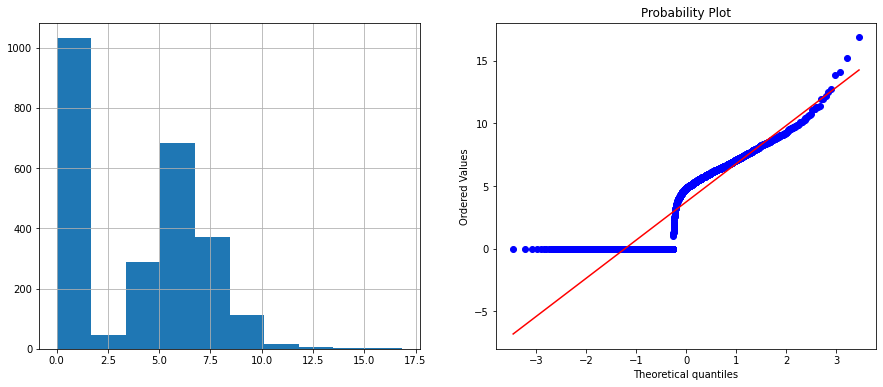

In [ ]:
first('NaturalGas(therms)')

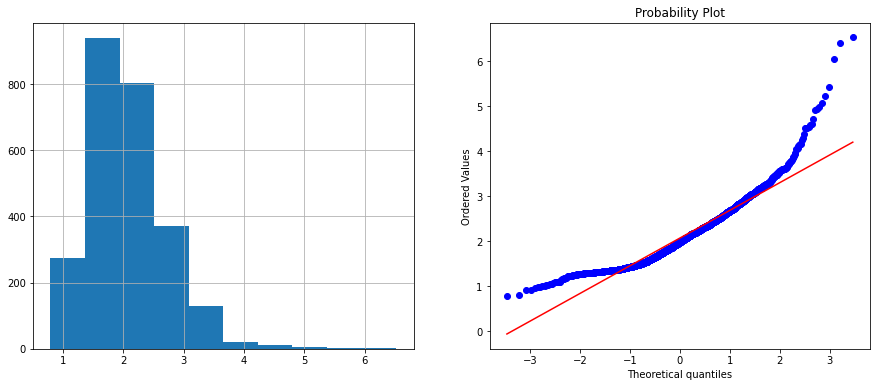

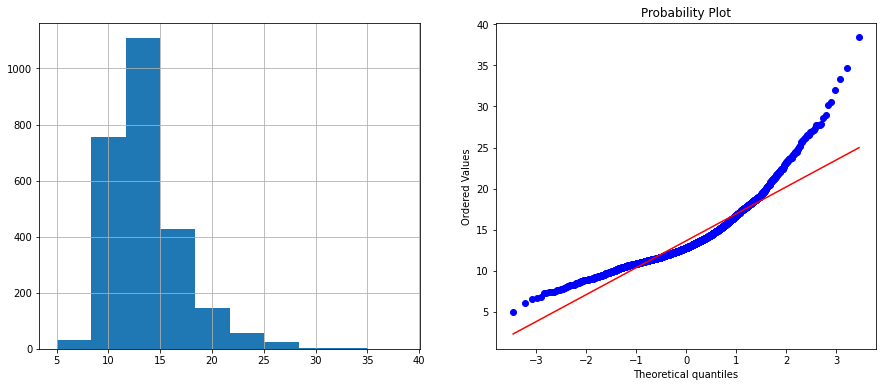

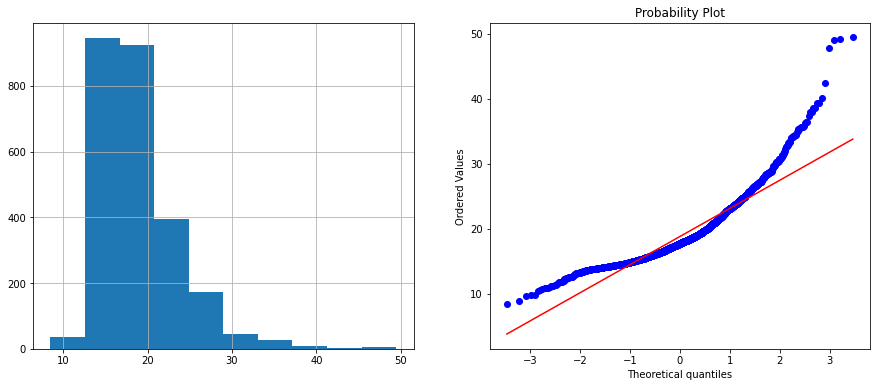

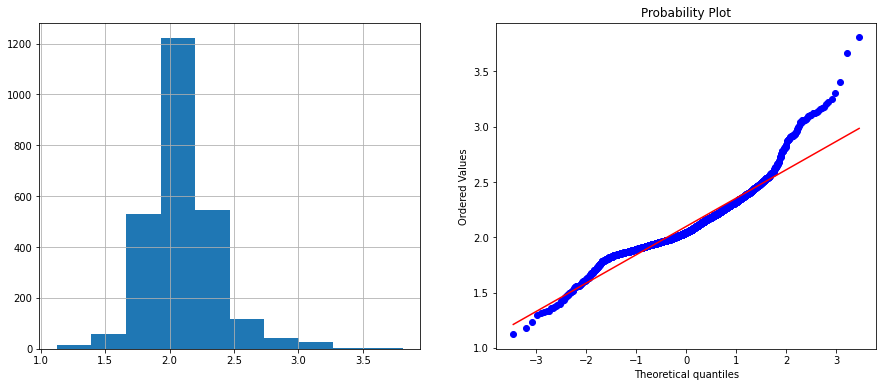

In [ ]:
first('GHGEmissions(MetricTonsCO2e)')
first('Electricity(kWh)')
first('SiteEnergyUse(kBtu)')
first('SiteEUI(kBtu/sf)')

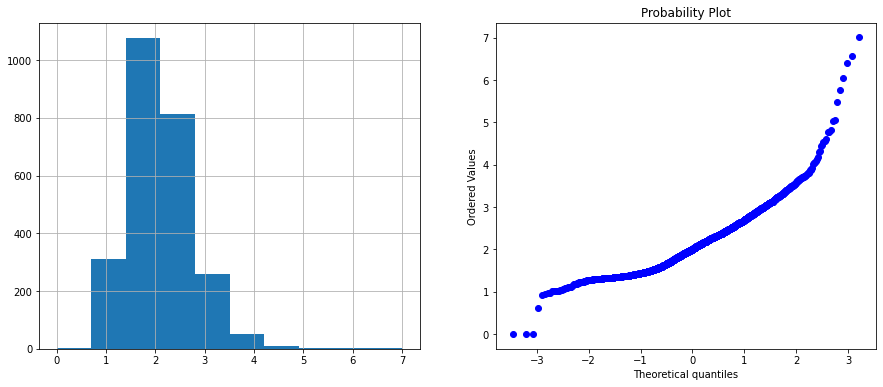

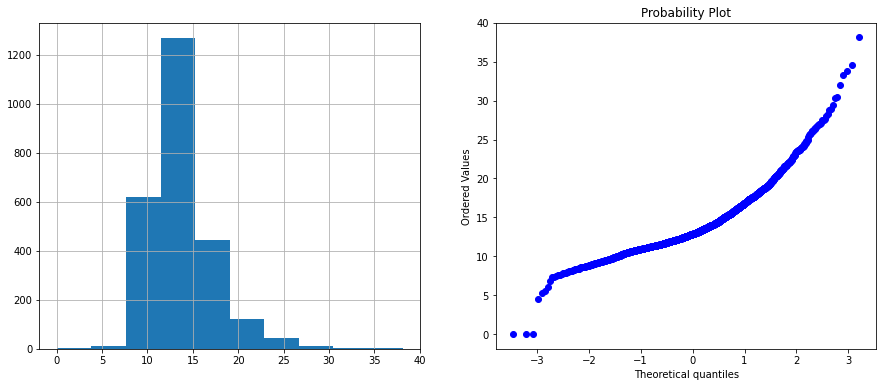

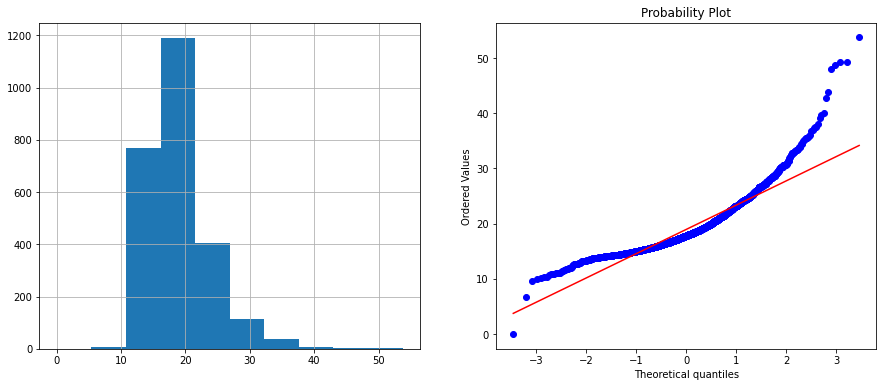

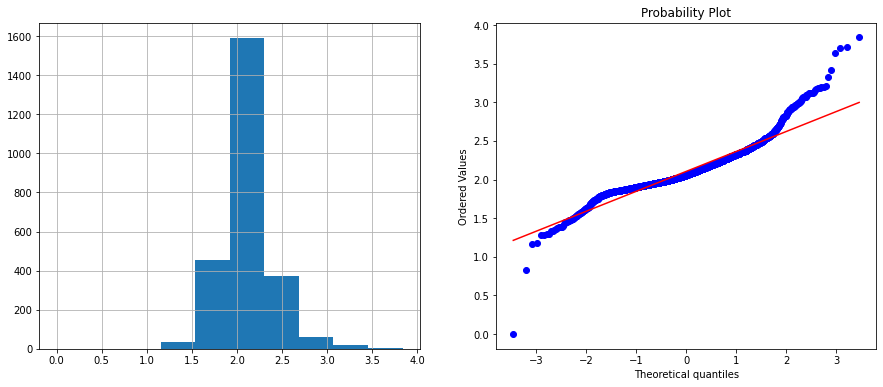

In [ ]:
second('GHGEmissions(MetricTonsCO2e)')
second('Electricity(kWh)')
second('SiteEnergyUse(kBtu)')
second('SiteEUI(kBtu/sf)')

## using exponential to reduce the skew ness

In [ ]:
(df_2015['SiteEnergyUse(kBtu)']).corr(df_2015['GHGEmissions(MetricTonsCO2e)'])

0.8827934971603132

In [ ]:
(df_2015['SiteEnergyUse(kBtu)exp']).corr(df_2015['GHGEmissions(MetricTonsCO2e)exp'])

0.8927669071634424

In [ ]:
(df_2015['Electricity(kWh)']).corr(df_2015['GHGEmissions(MetricTonsCO2e)'])

0.6758812041415817

In [ ]:
(df_2015['Electricity(kWh)exp']).corr(df_2015['GHGEmissions(MetricTonsCO2e)exp'])

0.677413510610093

In [ ]:

(df_2015['SiteEUI(kBtu/sf)']).corr(df_2015['GHGEmissions(MetricTonsCO2e)'])

0.35127839364204977

In [ ]:
(df_2015['SiteEUI(kBtu/sf)exp']).corr(df_2015['GHGEmissions(MetricTonsCO2e)exp'])

0.6772795268582351

In [ ]:
import numpy as np
import seaborn as sns

# Plotting hist plot for the 2015 data for features used for traning 

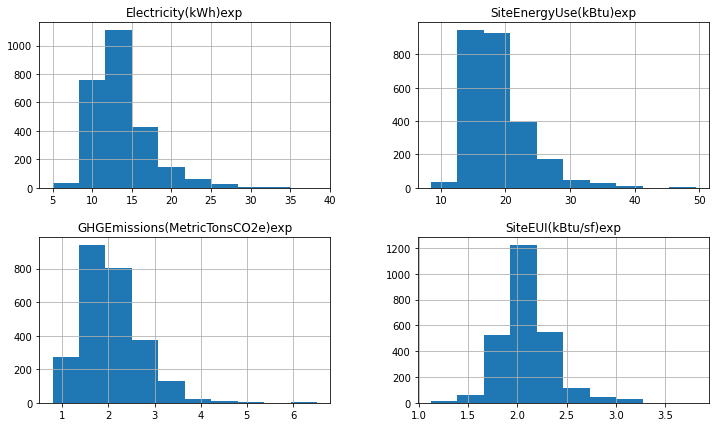

In [ ]:
viz = df_2015[['Electricity(kWh)exp','SiteEnergyUse(kBtu)exp','GHGEmissions(MetricTonsCO2e)exp','SiteEUI(kBtu/sf)exp']]
viz.hist(figsize=(12,7))
plt.show()

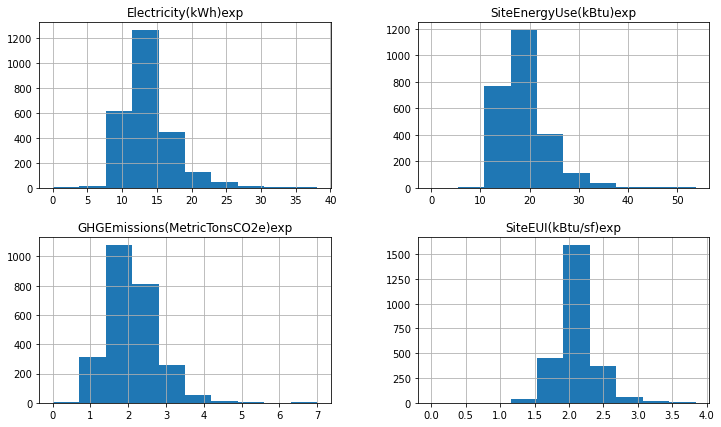

In [ ]:
viz1 = df_2016[['Electricity(kWh)exp','SiteEnergyUse(kBtu)exp','GHGEmissions(MetricTonsCO2e)exp','SiteEUI(kBtu/sf)exp']]
viz1.hist(figsize=(12,7))
plt.show()

In [ ]:
def plot2015(x):
  sns.scatterplot(x=x ,y='GHGEmissions(MetricTonsCO2e)exp' ,data=df_2015).set_title('Scatter plot 2015')
def plot2016(x):
  sns.scatterplot(x=x ,y='GHGEmissions(MetricTonsCO2e)exp' ,data=df_2016).set_title('Scatter plot 2016')

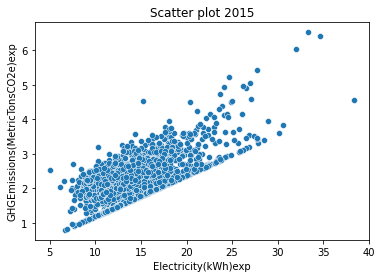

In [ ]:
plot2015('Electricity(kWh)exp')

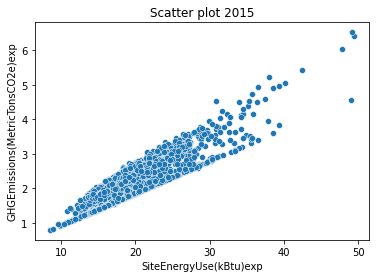

In [ ]:
plot2015('SiteEnergyUse(kBtu)exp')

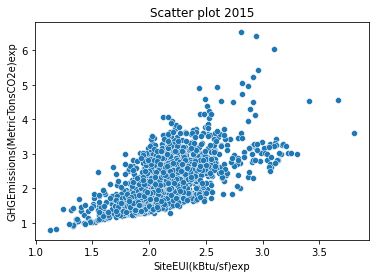

In [ ]:
plot2015('SiteEUI(kBtu/sf)exp')

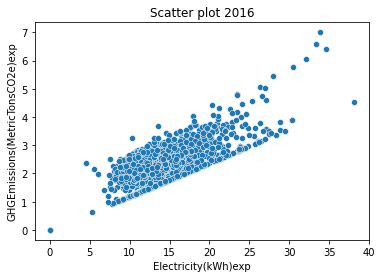

In [ ]:

plot2016('Electricity(kWh)exp')

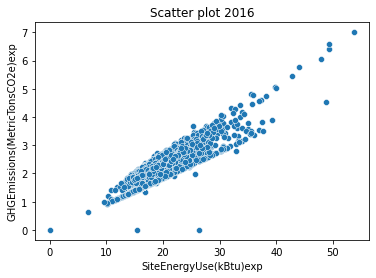

In [ ]:
plot2016('SiteEnergyUse(kBtu)exp')

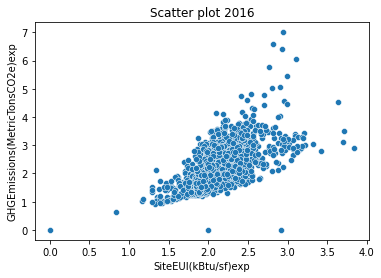

In [ ]:
plot2016('SiteEUI(kBtu/sf)exp')

In [ ]:

from sklearn.model_selection import train_test_split
X = viz[['Electricity(kWh)exp','SiteEnergyUse(kBtu)exp','SiteEUI(kBtu/sf)exp']]
y= viz['GHGEmissions(MetricTonsCO2e)exp']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
Yhat =regr.predict(X_test[['Electricity(kWh)exp','SiteEnergyUse(kBtu)exp','SiteEUI(kBtu/sf)exp']])
y_test = np.asanyarray(y_test)
print("test data score",regr.score(X_test,y_test))
print("train data score",regr.score(X_train,y_train))
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(Yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Yhat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(Yhat ,y_test) )

Coefficients:  [-0.20504463  0.26662627  0.00350006]
Intercept:  -0.15594711628157576
test data score 0.9672844690679052
train data score 0.9655319741259931
Mean absolute error: 0.10
Residual sum of squares (MSE): 0.01
R2-score: 0.97


#Coefficients:  [-0.20504463  0.26662627  0.00350006]
#Intercept:  -0.15594711628157576
#test data score 0.9672844690679052
#train data score 0.9655319741259931
#Mean absolute error: 0.10
#Residual sum of squares (MSE): 0.01
#R2-score: 0.97

In [ ]:
#x_train = np.asanyarray(X_train[['Electricity(kWh)exp','SiteEnergyUse(kBtu)exp','SiteEUI(kBtu/sf)exp']])
#y_train = np.asanyarray(y_train)

In [ ]:
#x_train= x_train.reshape(-1, 1)
#y_train= y_train.reshape(-1, 1)

In [ ]:
#x_test= np.asanyarray(X_test[['Electricity(kWh)exp','SiteEnergyUse(kBtu)exp','SiteEUI(kBtu/sf)exp']])
#y_test = np.asanyarray(y_test)
#x_test= x_test.reshape(-1, 1)
#y_test= y_test.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X16 = viz1[['Electricity(kWh)exp','SiteEnergyUse(kBtu)exp','SiteEUI(kBtu/sf)exp']]
y16= viz1['GHGEmissions(MetricTonsCO2e)exp']
X_train16,X_test16,y_train16,y_test16 = train_test_split(X16, y16, test_size=0.3, random_state=1)
from sklearn import linear_model
regr2016 = linear_model.LinearRegression()
regr2016.fit (X_train16, y_train16)
print('Coefficients: ', regr2016.coef_)
print('Intercept: ',regr2016.intercept_)
Yhat2016 =regr2016.predict(X_test16[['Electricity(kWh)exp','SiteEnergyUse(kBtu)exp','SiteEUI(kBtu/sf)exp']])
print("test score",regr2016.score(X_test16,y_test16))
print("train score",regr2016.score(X_train16,y_train16))
y_test16 = np.asanyarray(y_test16)
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(Yhat2016 - y_test16)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Yhat2016 - y_test16) ** 2))
print("R2-score: %.2f" % r2_score(Yhat2016 ,y_test16))

Coefficients:  [-0.15004845  0.22623525  0.02735087]
Intercept:  -0.20394611301305066
test score 0.9460785847641238
train score 0.8929097327887698
Mean absolute error: 0.12
Residual sum of squares (MSE): 0.02
R2-score: 0.94


#Coefficients:  [-0.15004845  0.22623525  0.02735087]
#Intercept:  -0.20394611301305066
#test score 0.9460785847641238
#train score 0.8929097327887698
#Mean absolute error: 0.12
#Residual sum of squares (MSE): 0.02
#R2-score: 0.94

# Using the 2016 data set to test acuracy of 2015 regrestion model 

In [ ]:
regr.score(X_test16,y_test16)

0.9460785847641238

In [ ]:
regr.score(X_train16,y_train16)

0.8929097327887698

# Using the 2015 data set to test acuracy of 2016 regrestion model 

In [ ]:
regr2016.score(X_test,y_test)

0.9541048570589364

In [ ]:
regr2016.score(X_train,y_train)

0.9538884112610972

# using k fold cross validation with split 5 

In [ ]:
from sklearn.model_selection import cross_val_score
scores15 = cross_val_score(regr, X, y, cv=5)
print("scores",scores15)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores15.mean(), scores15.std()))

scores [0.94123748 0.96299865 0.96341408 0.95654756 0.96481074]
0.96 accuracy with a standard deviation of 0.01


In [ ]:
scores16 = cross_val_score(regr2016, X16, y16, cv=5)
print("scores",scores16)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores16.mean(), scores16.std()))

scores [0.77401599 0.87454866 0.95879441 0.9496415  0.95302158]
0.90 accuracy with a standard deviation of 0.07


# using k fold cross validation with split 10

In [ ]:
from sklearn.model_selection import cross_val_score
scores15 = cross_val_score(regr, X, y, cv=10)
print("scores",scores15)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores15.mean(), scores15.std()))

scores [0.94066301 0.94677872 0.96360304 0.96178267 0.96172394 0.96618696
 0.95464987 0.95965088 0.96156071 0.96488887]
0.96 accuracy with a standard deviation of 0.01


In [ ]:
scores16 = cross_val_score(regr2016, X16, y16, cv=10)
print("scores",scores16)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores16.mean(), scores16.std()))

scores [0.92931774 0.50242652 0.94542479 0.81847533 0.96958371 0.94362735
 0.93920592 0.96020248 0.94216501 0.95539078]
0.89 accuracy with a standard deviation of 0.14


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [ ]:
scikit-optimize

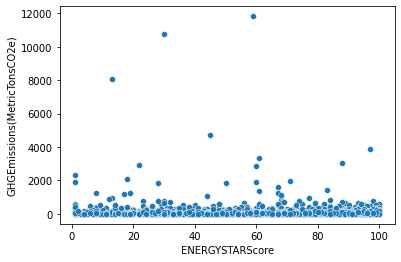

In [ ]:
sns.scatterplot(x='ENERGYSTARScore' ,y='GHGEmissions(MetricTonsCO2e)' ,data=df_2015)

In [ ]:
#testing 

try feature engg

In [ ]:
df_2015['ENERGYSTARScore'].

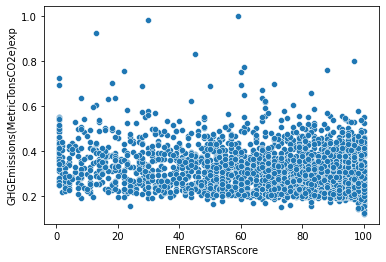

In [ ]:
sns.scatterplot(x='ENERGYSTARScore' ,y='GHGEmissions(MetricTonsCO2e)exp' ,data=df_2015)